In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

In [16]:
URL = "https://pl.wikipedia.org/wiki/Dane_statystyczne_o_miastach_w_Polsce"
resp = requests.get(URL) 
if resp.status_code == 200:
    soup = BeautifulSoup(resp.content, 'html.parser')
    tab = soup.find('table', {'class':"wikitable"})
cities = pd.read_html(str(tab))[0]
#df.head()
cities = cities[['Miasto', 'Powierzchnia [ha] (01.01.2021)']]
cities.rename(columns = {'Powierzchnia [ha] (01.01.2021)':'Powierzchnia', 'Liczba ludności (01.01.2021)': 'Liczba ludności'}, inplace=True)
cities.sort_values(by='Powierzchnia')
cities['Powierzchnia'].mean()
cities['Powierzchnia'].median()

1332.5

Text(0, 0.5, 'gęstość')

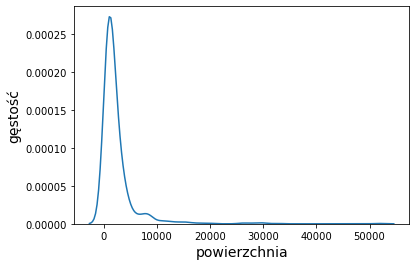

In [20]:
X = cities['Powierzchnia'].values
sns.kdeplot(data=X)
plt.xlabel('powierzchnia', fontsize=14)
plt.ylabel('gęstość', fontsize=14)

In [22]:
schools = pd.read_csv('Ucz_klasy_dyscypliny_sportowe_województwo_typjedn_rokszkolny20202021.csv')
schools.head()

,idTerytGmina,idTerytWojewodztwo,Wojewodztwo,Powiat,Gmina,Miejscowosc,RSPO,idTypPodmiotu,TypPodmiotu,NazwaPlacowki,...,idSpecyfikaSzkoly,SpecyfikaSzkoly,idPublicznosc,Publicznosc,organ prowadzacy,idDyscyplinaSportowa,DyscyplinaSportowa,idKlasa,Klasa,lb_uczniow
0,202021,2,DOLNOŚLĄSKIE,dzierżoniowski,Dzierżoniów,Dzierżoniów,64260,3,Szkoła podstawowa,SZKOŁA PODSTAWOWA NR 3 IM. KOMISJI EDUKACJI NA...,...,100,brak specyfiki,1,publiczna,jst,17,Piłka ręczna,7,IV,22
1,202021,2,DOLNOŚLĄSKIE,dzierżoniowski,Dzierżoniów,Dzierżoniów,64260,3,Szkoła podstawowa,SZKOŁA PODSTAWOWA NR 3 IM. KOMISJI EDUKACJI NA...,...,100,brak specyfiki,1,publiczna,jst,17,Piłka ręczna,9,VI,20
2,202021,2,DOLNOŚLĄSKIE,dzierżoniowski,Dzierżoniów,Dzierżoniów,64260,3,Szkoła podstawowa,SZKOŁA PODSTAWOWA NR 3 IM. KOMISJI EDUKACJI NA...,...,100,brak specyfiki,1,publiczna,jst,17,Piłka ręczna,10,VII,20
3,202021,2,DOLNOŚLĄSKIE,dzierżoniowski,Dzierżoniów,Dzierżoniów,73077,3,Szkoła podstawowa,SZKOŁA PODSTAWOWA NR 9 IM. MIKOŁAJA KOPERNIKA ...,...,100,brak specyfiki,1,publiczna,jst,4,Gimnastyka,9,VI,30
4,202021,2,DOLNOŚLĄSKIE,dzierżoniowski,Dzierżoniów,Dzierżoniów,73077,3,Szkoła podstawowa,SZKOŁA PODSTAWOWA NR 9 IM. MIKOŁAJA KOPERNIKA ...,...,100,brak specyfiki,1,publiczna,jst,4,Gimnastyka,10,VII,27


In [32]:
df1 = schools[['Wojewodztwo', 'lb_uczniow']].groupby(['Wojewodztwo']).sum()
df1.rename(columns = {'lb_uczniow':'Liczba uczniów'}, inplace=True)
df1 = df1.sort_values(by='Liczba uczniów', ascending=False)
df1.head()

df2 = schools[['Miejscowosc', 'lb_uczniow']].groupby(['Miejscowosc']).sum()
df2.rename(columns = {'lb_uczniow':'Liczba uczniów'}, inplace=True)
df2 = df2.sort_values(by='Liczba uczniów', ascending=False)
df2.head()

,Liczba uczniów
Miejscowosc,
Szczecin,4685
Bydgoszcz,3587
Gdańsk,3527
Białystok,2718
Poznań-Nowe Miasto,2192


In [33]:
df3 = schools[['TypPodmiotu', 'lb_uczniow']].groupby(['TypPodmiotu']).sum()
df3.rename(columns = {'lb_uczniow':'Liczba uczniów'}, inplace=True)
df3 = df3.sort_values(by='Liczba uczniów', ascending=False)
df3.head()

,Liczba uczniów
TypPodmiotu,
Szkoła podstawowa,117165
Liceum ogólnokształcące,25712
Technikum,653
Branżowa szkoła I stopnia,5


In [34]:
df4 = schools[['DyscyplinaSportowa', 'lb_uczniow']].groupby(['DyscyplinaSportowa']).sum()
df4.rename(columns = {'lb_uczniow':'Liczba uczniów'}, inplace=True)
df4 = df4.sort_values(by='Liczba uczniów', ascending=False)
df4.head()

,Liczba uczniów
DyscyplinaSportowa,
Piłka nożna,33398
Piłka siatkowa,24134
Sport pływacki,22828
Koszykówka,13118
Piłka ręczna,12995


In [35]:
students_overall_by_city = schools[['Miejscowosc', 'lb_uczniow']].groupby(['Miejscowosc']).sum()
students_overall_by_city.rename(columns = {'lb_uczniow':'Liczba uczniów'}, inplace=True)
students_overall_by_city.head()

,Liczba uczniów
Miejscowosc,
Aleksandrów Łódzki,401
Alwernia,40
Andrychów,20
Annopol,9
Augustów,37


In [36]:
data1 = cities.set_index('Miasto').join(students_overall_by_city)
data1 = data1.dropna()
data1.head()

,Powierzchnia,Liczba uczniów
Aleksandrów Łódzki,1382,401.0
Alwernia,888,40.0
Andrychów,1033,20.0
Annopol,773,9.0
Augustów,8090,37.0


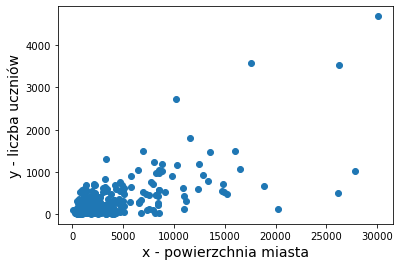

In [37]:
X = data1['Powierzchnia'].values
Y = data1['Liczba uczniów'].values
plt.xlabel('x - powierzchnia miasta', fontsize=14)
plt.ylabel('y - liczba uczniów', fontsize=14)
plt.scatter(X, Y)
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

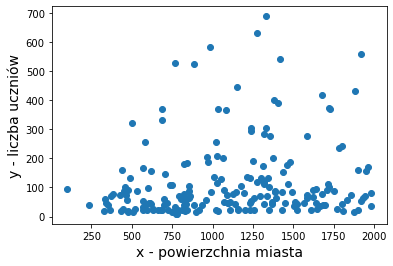

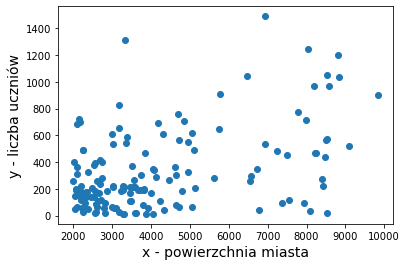

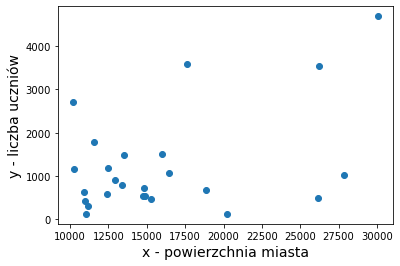

In [39]:
data1_small_cities = data1[data1['Powierzchnia']<2000]
data1_medium_cities = data1[(data1['Powierzchnia']>=2000) & (data1['Powierzchnia']<10000)]
data1_large_cities = data1[data1['Powierzchnia']>=10000]

X_small_cities = data1_small_cities['Powierzchnia'].values
Y_small_cities = data1_small_cities['Liczba uczniów'].values

X_medium_cities = data1_medium_cities['Powierzchnia'].values
Y_medium_cities = data1_medium_cities['Liczba uczniów'].values

X_large_cities = data1_large_cities['Powierzchnia'].values
Y_large_cities = data1_large_cities['Liczba uczniów'].values

plt.xlabel('x - powierzchnia miasta', fontsize=14)
plt.ylabel('y - liczba uczniów', fontsize=14)
plt.scatter(X_small_cities, Y_small_cities)
plt.show()

plt.xlabel('x - powierzchnia miasta', fontsize=14)
plt.ylabel('y - liczba uczniów', fontsize=14)
plt.scatter(X_medium_cities, Y_medium_cities)
plt.show()

plt.xlabel('x - powierzchnia miasta', fontsize=14)
plt.ylabel('y - liczba uczniów', fontsize=14)
plt.scatter(X_large_cities, Y_large_cities)
plt.show()

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [46]:
def draw_plot(X, Y, degree):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

    model_lin = LinearRegression()
    model_lin.fit(X_train.reshape(-1,1), Y_train)
    x_axis = np.linspace(start=X.min(), stop=X.max(), num=300)
    y_axis_reglin = model_lin.predict(x_axis.reshape(-1,1))

    gen_features = PolynomialFeatures(degree=degree, include_bias=True, interaction_only=False)
    model_GLM = LinearRegression()
    model_GLM.fit(gen_features.fit_transform(X_train.reshape(-1,1)), Y_train)
    y_axis_GLM = model_GLM.predict(gen_features.fit_transform(x_axis.reshape(-1,1)))

    plt.figure(figsize=(10,7))
    plt.scatter(X_train, Y_train, label='dane treningowe', alpha=0.7)
    plt.scatter(X_test, Y_test, edgecolor='black', facecolor='none', label='dane testujące')
    plt.xlabel('powierzchnia miasta', fontsize=14)
    plt.ylabel('liczba uczniów', fontsize=14)
    plt.plot(x_axis, y_axis_reglin, label='model liniowy', color='tab:orange')
    plt.plot(x_axis, y_axis_GLM, label=f'model GLM', color='tab:red')
    plt.legend(fontsize=12, shadow=True, loc='upper left')
    plt.show()

    print(f'Linear model parameters: {np.round(model_lin.coef_,5)}, {np.round(model_lin.intercept_,5)}')
    MSE_reglin = mean_squared_error(Y_test, model_lin.predict(X_test.reshape(-1,1)))
    print(f'Mean squared error for test data: {MSE_reglin:0.3}\n')
    MSE_reglin_2 = mean_squared_error(Y_train, model_lin.predict(X_train.reshape(-1,1)))
    print(f'Mean squared error for train data: {MSE_reglin_2:0.3}\n')

    print(f'GLM parameters: {np.round(model_GLM.coef_,4)}, {np.round(model_GLM.intercept_,5)}')
    MSE_GLM = mean_squared_error(Y_test, model_GLM.predict(gen_features.fit_transform(X_test.reshape(-1,1))))
    print(f'Mean squared error for test data: {MSE_GLM:0.3}\n')
    MSE_GLM_2 = mean_squared_error(Y_train, model_lin.predict(X_train.reshape(-1,1)))
    print(f'Mean squared error for train data: {MSE_GLM_2:0.3}\n')

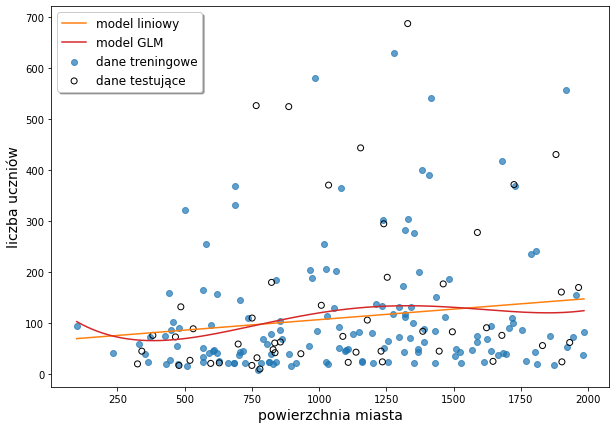

Linear model parameters: [0.04137], 65.52595
Mean squared error for test data: 2.42e+04

Mean squared error for train data: 1.42e+04

GLM parameters: [ 0.     -0.4622  0.0009 -0.      0.    ], 140.49537
Mean squared error for test data: 2.37e+04

Mean squared error for train data: 1.42e+04



In [47]:
draw_plot(X_small_cities, Y_small_cities, 4)

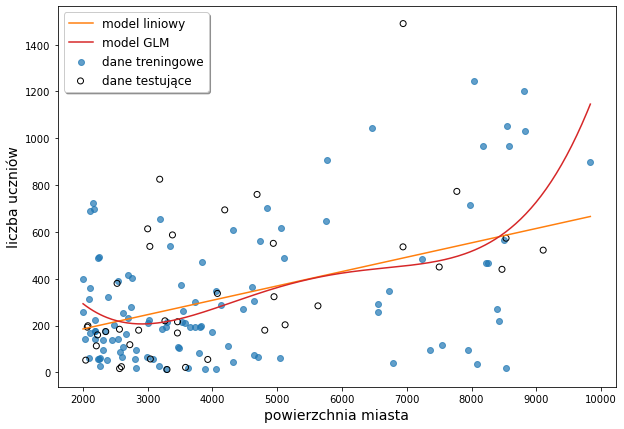

Linear model parameters: [0.06137], 62.27897
Mean squared error for test data: 6.73e+04

Mean squared error for train data: 7.27e+04

GLM parameters: [ 0.0000e+00 -1.3595e+00  4.0000e-04 -0.0000e+00  0.0000e+00], 1689.14226
Mean squared error for test data: 7.51e+04

Mean squared error for train data: 7.27e+04



In [49]:
draw_plot(X_medium_cities, Y_medium_cities, 4)

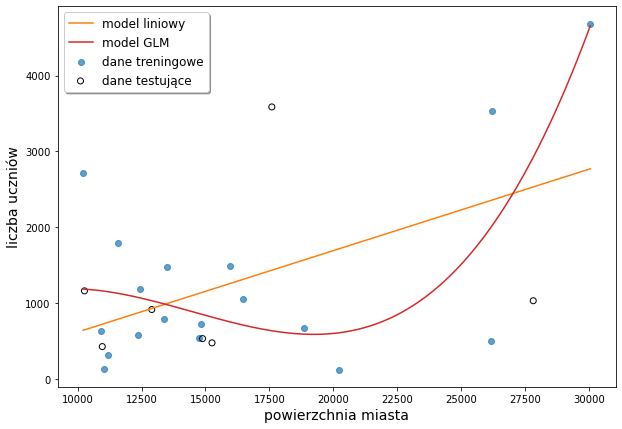

Linear model parameters: [0.10724], -451.12106
Mean squared error for test data: 1.16e+06

Mean squared error for train data: 1.04e+06

GLM parameters: [ 0.000e+00  7.734e-01 -1.000e-04  0.000e+00], -1926.45355
Mean squared error for test data: 1.86e+06

Mean squared error for train data: 1.04e+06



In [53]:
draw_plot(X_large_cities, Y_large_cities, 3)

In [54]:
students_in_football_classes = schools[schools['DyscyplinaSportowa'] == 'Piłka nożna']
students_in_football_classes = students_in_football_classes[['Miejscowosc', 'lb_uczniow']].groupby(['Miejscowosc']).sum()
students_in_football_classes.rename(columns = {'lb_uczniow':'Liczba uczniów'}, inplace=True)
students_in_football_classes.head()

,Liczba uczniów
Miejscowosc,
Aleksandrów Łódzki,39
Alwernia,20
Baboszewo,45
Barcin,24
Barczewo,37


In [55]:
data2 = cities.set_index('Miasto').join(students_in_football_classes)
data2 = data2.dropna()

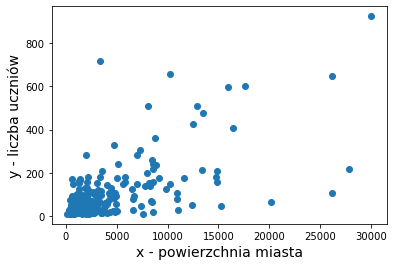

In [56]:
X_football = data2['Powierzchnia'].values
Y_football = data2['Liczba uczniów'].values
plt.xlabel('x - powierzchnia miasta', fontsize=14)
plt.ylabel('y - liczba uczniów', fontsize=14)
plt.scatter(X_football, Y_football)
plt.show()

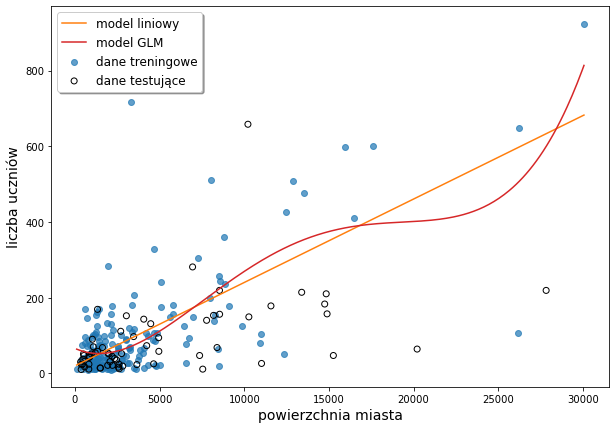

Linear model parameters: [0.02204], 19.60489
Mean squared error for test data: 1.45e+04

Mean squared error for train data: 8.85e+03

GLM parameters: [ 0.   -0.02  0.   -0.    0.  ], 65.7104
Mean squared error for test data: 1.43e+04

Mean squared error for train data: 8.85e+03



In [59]:
draw_plot(X_football, Y_football, 4)

In [60]:
students_in_volleyball_classes = schools[schools['DyscyplinaSportowa'] == 'Piłka siatkowa']
students_in_volleyball_classes = students_in_volleyball_classes[['Miejscowosc', 'lb_uczniow']].groupby(['Miejscowosc']).sum()
students_in_volleyball_classes.rename(columns = {'lb_uczniow':'Liczba uczniów'}, inplace=True)
students_in_volleyball_classes.head()

,Liczba uczniów
Miejscowosc,
Alwernia,20
Andrychów,20
Annopol,9
Augustów,6
Barczewo,44


In [61]:
data3 = cities.set_index('Miasto').join(students_in_volleyball_classes)
data3 = data3.dropna()

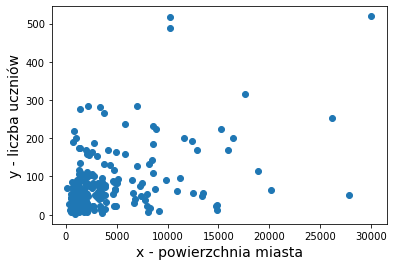

In [62]:
X_volleyball = data3['Powierzchnia'].values
Y_volleyball = data3['Liczba uczniów'].values
plt.xlabel('x - powierzchnia miasta', fontsize=14)
plt.ylabel('y - liczba uczniów', fontsize=14)
plt.scatter(X_volleyball, Y_volleyball)
plt.show()

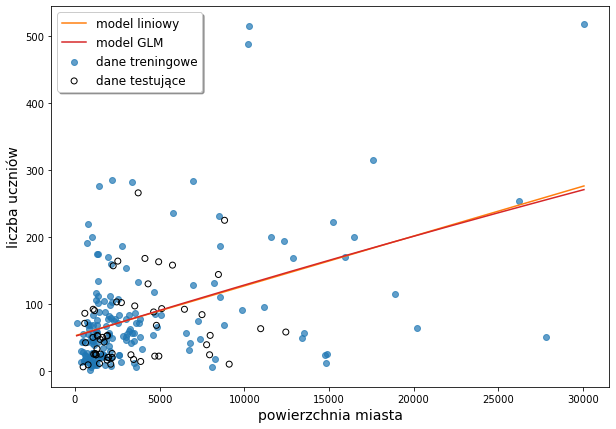

Linear model parameters: [0.00745], 52.47396
Mean squared error for test data: 3.23e+03

Mean squared error for train data: 6.2e+03

GLM parameters: [ 0.      0.0078 -0.    ], 51.66806
Mean squared error for test data: 3.23e+03

Mean squared error for train data: 6.2e+03



In [65]:
draw_plot(X_volleyball, Y_volleyball, 2)

In [66]:
students_in_swimming_classes = schools[schools['DyscyplinaSportowa'] == 'Sport pływacki']
students_in_swimming_classes = students_in_swimming_classes[['Miejscowosc', 'lb_uczniow']].groupby(['Miejscowosc']).sum()
students_in_swimming_classes.rename(columns = {'lb_uczniow':'Liczba uczniów'}, inplace=True)
students_in_swimming_classes.head()

,Liczba uczniów
Miejscowosc,
Aleksandrów Łódzki,4
Augustów,9
Barcin,24
Białogard,48
Białołęka,142


In [67]:
data4 = cities.set_index('Miasto').join(students_in_swimming_classes)
data4 = data4.dropna()

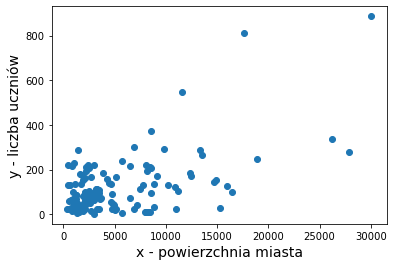

In [68]:
X_swimming = data4['Powierzchnia'].values
Y_swimming = data4['Liczba uczniów'].values
plt.xlabel('x - powierzchnia miasta', fontsize=14)
plt.ylabel('y - liczba uczniów', fontsize=14)
plt.scatter(X_swimming, Y_swimming)
plt.show()

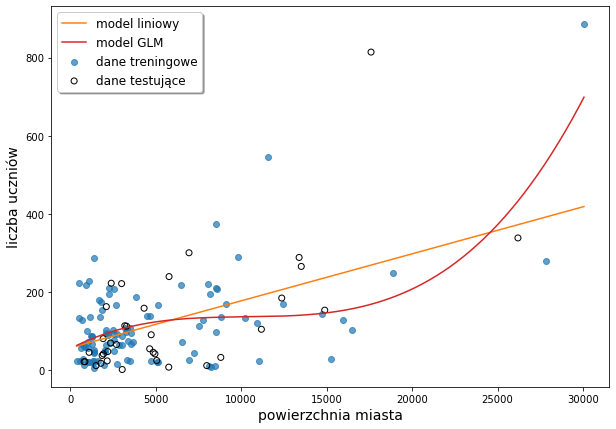

Linear model parameters: [0.01204], 56.56328
Mean squared error for test data: 1.41e+04

Mean squared error for train data: 9.23e+03

GLM parameters: [ 0.      0.0228 -0.      0.    ], 54.42509
Mean squared error for test data: 1.82e+04

Mean squared error for train data: 9.23e+03



In [70]:
draw_plot(X_swimming, Y_swimming, 3)

In [71]:
students_in_primary_schools = schools[schools['TypPodmiotu'] == 'Szkoła podstawowa']
students_in_primary_schools = students_in_primary_schools[['Miejscowosc', 'lb_uczniow']].groupby(['Miejscowosc']).sum()
students_in_primary_schools.rename(columns = {'lb_uczniow':'Liczba uczniów'}, inplace=True)
students_in_primary_schools.head()

,Liczba uczniów
Miejscowosc,
Aleksandrów Łódzki,290
Alwernia,40
Andrychów,20
Annopol,9
Augustów,37


In [72]:
data5 = cities.set_index('Miasto').join(students_in_primary_schools)
data5 = data5.dropna()

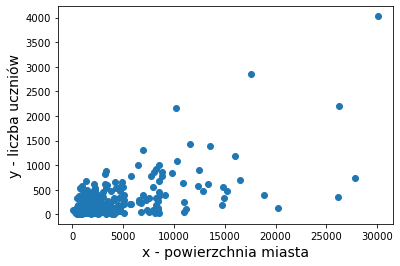

In [73]:
X_primary_schools = data5['Powierzchnia'].values
Y_primary_schools = data5['Liczba uczniów'].values
plt.xlabel('x - powierzchnia miasta', fontsize=14)
plt.ylabel('y - liczba uczniów', fontsize=14)
plt.scatter(X_primary_schools, Y_primary_schools)
plt.show()

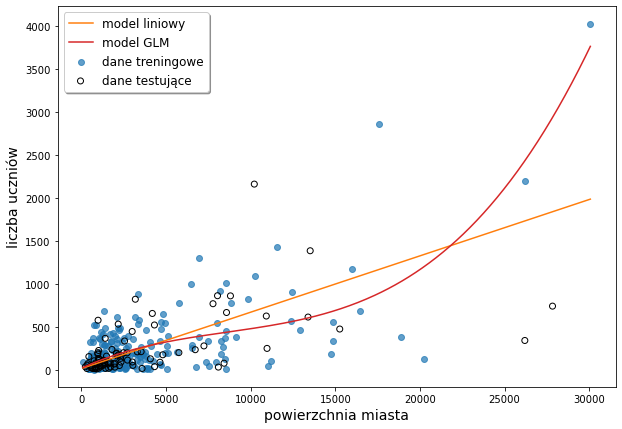

Linear model parameters: [0.06544], 20.18011
Mean squared error for test data: 9.51e+04

Mean squared error for train data: 7.94e+04

GLM parameters: [ 0.      0.0893 -0.      0.    ], 24.95607
Mean squared error for test data: 1.68e+05

Mean squared error for train data: 7.94e+04



In [76]:
draw_plot(X_primary_schools, Y_primary_schools, 3)

In [77]:
students_in_high_schools = schools[schools['TypPodmiotu'] == 'Liceum ogólnokształcące']
students_in_high_schools = students_in_high_schools[['Miejscowosc', 'lb_uczniow']].groupby(['Miejscowosc']).sum()
students_in_high_schools.rename(columns = {'lb_uczniow':'Liczba uczniów'}, inplace=True)
students_in_high_schools.head()

,Liczba uczniów
Miejscowosc,
Aleksandrów Łódzki,111
Bełchatów,108
Białystok,556
Bielany,726
Bielsko-Biała,284


In [78]:
data6 = cities.set_index('Miasto').join(students_in_high_schools)
data6 = data6.dropna()

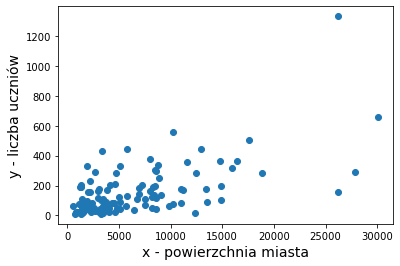

In [79]:
X_high_schools = data6['Powierzchnia'].values
Y_high_schools = data6['Liczba uczniów'].values
plt.xlabel('x - powierzchnia miasta', fontsize=14)
plt.ylabel('y - liczba uczniów', fontsize=14)
plt.scatter(X_high_schools, Y_high_schools)
plt.show()

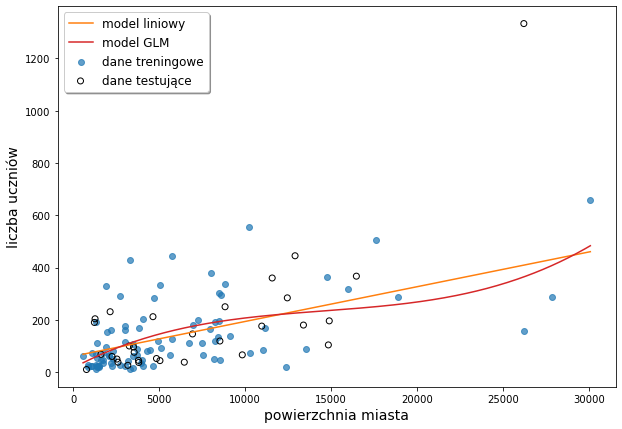

Linear model parameters: [0.0133], 60.6995
Mean squared error for test data: 3.53e+04

Mean squared error for train data: 1.22e+04

GLM parameters: [ 0.     0.035 -0.     0.   ], 15.99466
Mean squared error for test data: 3.9e+04

Mean squared error for train data: 1.22e+04



In [81]:
draw_plot(X_high_schools, Y_high_schools, 3)